In [1]:
# This cell is needed if running from source directory without installing TinyQsim
import sys, os
sys.path.append(os.path.abspath('..'))

## Example 1: Tutorial Introduction to TinyQsim

### Purpose

This tutorial uses the simple example of a 2-qubit entangled state to demostrate some of the basic features of TinyQsim, including:
- Creating a quantum circuit
- Adding gates to the circuit
- Examining the quantum state
- Measuring one or more qubits
- Printing probabilities of measurement outcomes
- Printing counts of each state for a number of runs
- Plotting probabilities and counts as histograms
- Displaying states in LaTeX
- Drawing a Bloch sphere

### Creating a Quantum Circuit

The first step is to import the TinyQsim components that we will need. For simple examples, the following is sufficient:

In [2]:
from tinyqsim.qcircuit import QCircuit

A quantum circuit with 2 qubits can then be created as follows. By default, the circuit is initialized with all qubits equal to $\ket{0}$.

In [3]:
qc = QCircuit(2)  # State = |00>

The state is not something that is observable in a real quantum system but we can see it in a simulation, which is very useful for understanding what is happening.

The state can be displayed in various ways. The raw state vector can be access using the 'qc.state_vector' property:

In [4]:
print(qc.state_vector)

[1 0 0 0]


The 4 elements of the state correspond to the projections onto the 4 orthogonal basis vectors $\ket{00}, \ket{01}, \ket{10}, \ket{11}$, so the state in this case is $\ket{00}$. 

It is easier to see that this vector corresponds to the state $\ket{00}$ if we use the 'components' method. This just prints values that are non-zero and it returns them as a dictionary of key-value pairs with the key corresponding to the label of the ket notation:

In [5]:
qc.components()

{'00': 1}

Alternatively, the state can be displayed in ket notation using LaTeX:

In [6]:
qc.display_state()

<IPython.core.display.Math object>

### Entangling the Qubits

The two qubits can be entangled using a Hadamard (H) gate and a controlled-NOT (CX) gate.

We will first add an X gate to configure the initial state by flipping qubit 1.

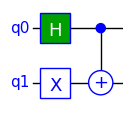

In [7]:
qc.x(1)      # Configure initial state
qc.h(0)      # Hadamard gate on qubit 0
qc.cx(0, 1)  # CX (controlled-NOT) gate
qc.draw()    # Draw the circuit

The Hadamard gate creates an equal superposition of $\ket{0}$ and $\ket{1}$:

$\qquad H \ket{0} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$

The CX gate applies an X operation to the second input if the first input is $\ket{1}$. However, the first input of the CX gate is in a superposition, so the output is also in a superposition: 

$\begin{align*}
\qquad\ket{\psi}&={\scriptsize\frac{1}{\sqrt{2}}}\ket{0}(X\ket{0}) + {\scriptsize\frac{1}{\sqrt{2}}}\ket{1} (X (X\ket{0}))\\
&= {\scriptsize\frac{1}{\sqrt{2}}}\ket{01} + {\scriptsize\frac{1}{\sqrt{2}}}\ket{10} )
\end{align*}
$

If we display the new state, we can see that it agrees:

In [8]:
qc.display_state(r'\ket{\psi} = ', decimals=4)

<IPython.core.display.Math object>

In [9]:
qc.components()

{'01': 0.70711, '10': 0.70711}

The state is entangled because the two qubits no longer have independent states. If we measure one of the two qubits, the result will have a 50% probability of being a 0 or 1, but the other qubit with then necessarily have the opposite value, even if we haven't measured it.

If we had omitted the X gate on qubit 1, we would have obtained a different entanglement where the two qubits had the same state instead of opposite states:

$\qquad\ket{\psi}= \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11} )$

### Probabilities

The probabilities of different measurement outcomes are the squares of the absolute values of the complex amplitudes, which in this case are $[0, \frac{1}{2},  \frac{1}{2}, 0]$. We can print the probabilities directly using the probabilities() method. By default, entries with zero probabilities are not included but can be added using the 'include_zeros' option.

In [10]:
qc.probabilities()

{'01': 0.5, '10': 0.5}

In [11]:
qc.probabilities(include_zeros=True)

{'00': 0.0, '01': 0.5, '10': 0.5, '11': 0.0}

Alternatively, the probabilities can be displayed as a histogram:

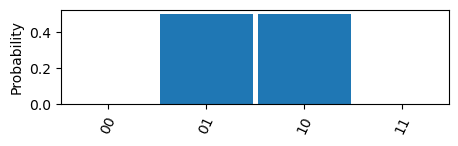

In [12]:
qc.plot_probabilities(height=0.75)

The 'height' option scales the vertical height of the plot relative to its default size.

The 'probabilities' and 'plot_probabilities' methods can be given a list of arguments specifying the qubits to be considered. The default is to use all qubits.

### Counts

With a real quantum computer, the only way to get a result is to perform a quantum measurement that collapses the state to one of the basis states. Consequently, the quantum circuits typically include measurements on the final state of each qubit. Probabilities are estimated by running the program many times and looking at the frequencies of the various measurement outcomes.

However, with a simulator we can calculate the probabilities directly without needing to run the circuit many times. This gives a big performance improvement, which  can be important when the circuit contains more than a few qubits.

TinyQsim provides a 'counts' method that allows us to simulate multiple runs by performing a single run and then sampling the resulting probability distibution many times.

In [13]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

We can now use 'counts' to perform a repeated experiment. By default, the experiment runs 1000 times.

In [14]:
qc.counts()

{'01': 491, '10': 509}

Alternatively, the counts can be displayed as a histogram:

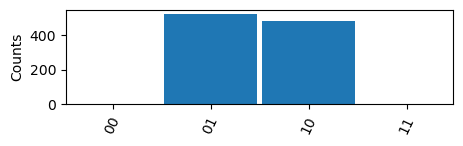

In [15]:
qc.plot_counts(height=0.75)

This is similar to the probability histogram except that it reflects the random nature of quantum measurements.

By default, the 'counts' method does not collapse the state.

Although making quantum measurements is the only way to get a result on a real quantum computer, the probabilities are often all we need when using a simulator. They tell us the expected outcome if we were to run the program many times.

Note that, when using 'counts' in the default resampling mode, the circuit should not contain any measurement operations.

### Measurement

When we measure the state of a real quantum system, the state collapses into one of the basis states, with the outcome weighted according to the probabilites. In TinyQsim, we can perform such a measurement using the 'measure' method. The qubits to be measured can be given as an argument list or, if left blank, all qubits are measured.

Let us measure qubit 0 of our entangled state:

In [16]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

print(qc.measure(0))

[0]


If we now look at the state again, we see that the state has collapsed to either the basis state $\ket{01}$ or $\ket{10}$:

In [17]:
qc.components()

{'01': 1.0}

Qubit 1 has collapsed to the opposite state to qubit 0 even though we only measured qubit 0. 

In [18]:
print(qc.measure(1))

[1]


The measurement operations are shown as meters in the circuit schematic:

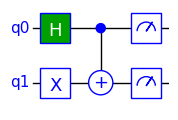

In [19]:
qc.draw()

The measurement results can also be obtained after the measurement by calling the 'results' method:

In [20]:
qc.results()

{0: 0, 1: 1}

This method returns the results as dictionary mapping the qubit number onto the measure value for all qubits that have been measured. If a qubit is measured more than once, the latest value is returned.

### Obtaining Counts with Measurements

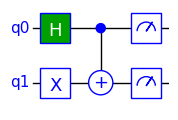

In [21]:
qc.draw()

If we just called 'counts' on the output of this circuit, we would only get one of the two possible outcomes, because the measurements have already collapsed the state. For example:

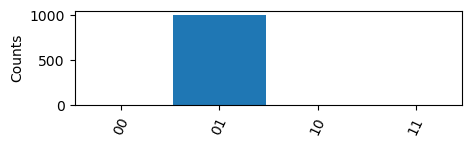

In [22]:
qc.plot_counts(runs=1000, height=0.75)

The best way to simulate measurement counts for this circuit is to omit the measurements from the outputs and call 'counts', as in the earlier example.

Measurements at the end of a circuit can simply be removed. Mid-circuit measurements are more tricky, but the circuit can in principle always be rearranged into an equivalent circuit with all measurements at the end, using the *Principle of deferred measurement*. These measurements can then be removed.

However, if we need to obtain counts from a circuit containing measurements, it is possible to call 'counts' with the option mode='repeat'. This re-
runs the whole circuit many times, rather than running it once and resampling the output:

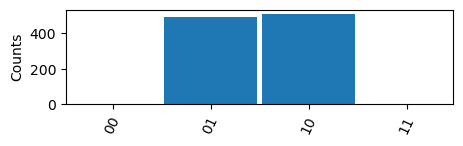

In [23]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 1)

qc.plot_counts(mode='repeat', runs=1000, height=0.75)

Performing 1000 runs on a circuit with only two qubits is not a problem, but the simulation may be around 1000 times slower than just using 'counts' without the measurement operations.

There is also another way to perform multiple runs on circuits containing measurements, using the  option mode='measure':

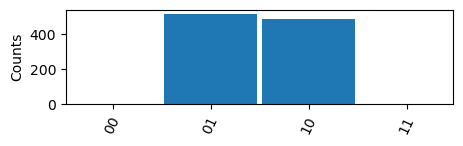

In [24]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 1)

qc.plot_counts(mode='measure', runs=1000, height=0.75)

For this simple example, it does not matter whether we use the mode 'repeat' or the mode 'measure'. The difference is as follows:

#### mode='repeat'

Perform multiple executions of the circuit, measuring the outputs once on each run. The circuit may contain measurement operations, including mid-circuit measurements. The results are samples of the output distribution rather than the measurement outcomes.

#### mode='measure'

Perform multiple executions of a circuit containing measurement operations. The results are counts of the measurement outcomes which are not necessarily on the circuit outputs. If there is no measurement "gate" on any of the requested qubits, the corresponding bit position in the output will be zero. If there are measurement operations on any qubits that are not requested, then their outcomes are not included in the output.

The deafault mode is 'resample', which is used when the circuit does not contain any measurement operations:

#### mode='resample'

Perform a single execution of the circuit and sample the resulting probability distribution multiple times. The circuit should not contain any measurement operations. This mode is much faster than the 'repeat' and 'measure' modes.

### LaTeX Formatting

States, arrays and matrices can be formatted as LaTeX and included in Jupyter notebooks or cut-and-pasted into LaTeX or Markdown documents.

This feature is still a prototype, so the API may change.

#### Displaying the State

We will start by creating a simple circuit:

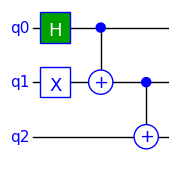

In [25]:
qc = QCircuit(3)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw()

The state can be displayed in a notebook using the 'display_state' method. A LaTeX prefix can be included if required and the number of decimal places can be specified:

In [26]:
qc.display_state()

<IPython.core.display.Math object>

In [27]:
qc.display_state(r'\ket{\psi} = ', decimals=4)

<IPython.core.display.Math object>

#### Accessing the Raw LaTeX

The raw LaTeX can be obtained for inclusion in other documents, as follows:

In [28]:
from tinyqsim.latex import latex_state, latex_array
from IPython.display import Math

In [29]:
print(latex_state(qc.state_vector, decimals=4))

0.7071\,\ket{011} + 0.7071\,\ket{100}


LaTeX math strings can be displayed in a notebook using the IPython Math class:

In [30]:
Math(latex_state(qc.state_vector, decimals=4))

<IPython.core.display.Math object>

The IPython 'display' function is called automatically for the last line in a notebook cell, otherwise it needs to be called explicitly:

In [31]:
display(Math(latex_state(qc.state_vector, decimals=4)))

<IPython.core.display.Math object>

The QCircuit 'display_state' method provides a more convenient way to do this for a quantum circuit.

In [32]:
qc.display_state(decimals=4)

<IPython.core.display.Math object>

#### LaTeX Arrays and Matrices

The 'latex_array' function can be used to format a numpy 1D or 2D array in LaTeX.

In [33]:
print(latex_array(qc.state_vector))

\begin{bmatrix}0.0&0.0&0.0&0.70710678&0.70710678&0.0&0.0&0.0 \end{bmatrix}


In [34]:
Math(latex_array(qc.state_vector))

<IPython.core.display.Math object>

In [35]:
from tinyqsim.gates import CX
latex_array(CX)

'\\begin{bmatrix}1&0&0&0\\\\0&1&0&0\\\\0&0&0&1\\\\0&0&1&0 \\end{bmatrix}'

In [36]:
Math(latex_array(CX, r'\text{CX} = '))

<IPython.core.display.Math object>

### Bloch Sphere

The state of a single qubit may be plotted on the Bloch sphere.

Consider the following quantum circuit:

In [37]:
PI = '\u03C0'  # PI unicode
from math import pi
from tinyqsim.bloch import plot_bloch

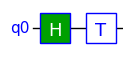

In [38]:
qc = QCircuit(1)  # This must be 1 qubit at present
qc.h(0)
qc.t(0)
qc.draw()

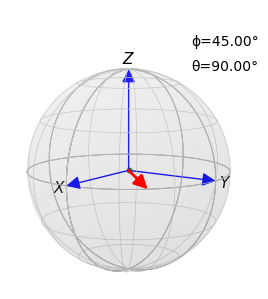

In [39]:
plot_bloch(qc.state_vector, scale=1.0)

The sphere can be rotated with the mouse when run from a Python script. When run from a Jupyter notebook, the orientation is fixed but the view point can be set using the optional parameters azimuth and elevation in degrees.